In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, IndexLocator
import numpy as np
import calplot

In [2]:
df = pd.read_csv("2022_schedule.csv")
df

,date,time,home,away
0,2022-04-29,19:30:00,LA,NC
1,2022-04-30,15:00:00,POR,KC
2,2022-04-30,19:00:00,CHI,LOU
3,2022-05-01,17:00:00,WAS,RGN
4,2022-05-01,18:00:00,HOU,SD
...,...,...,...,...
132,2022-10-16,16:00:00,HOU,KC
133,2022-10-16,19:00:00,SD,CHI
134,2022-10-23,14:00:00,POR,SD
135,2022-10-23,16:30:00,RGN,KC


In [9]:
df["date"] = pd.to_datetime(df["date"])
df["time"] = pd.to_datetime(df["time"])

# Get day of week
df["day_of_week"] = (df["date"].dt.dayofweek + 1) % 7

# Get hour of day
df["hour_of_day"] = df["time"].dt.hour

# Add empty column
df["empty"] = 1
df

,date,time,home,away,day_of_week,hour_of_day,empty
0,2022-04-29,2023-01-15 19:30:00,LA,NC,5,19,1
1,2022-04-30,2023-01-15 15:00:00,POR,KC,6,15,1
2,2022-04-30,2023-01-15 19:00:00,CHI,LOU,6,19,1
3,2022-05-01,2023-01-15 17:00:00,WAS,RGN,0,17,1
4,2022-05-01,2023-01-15 18:00:00,HOU,SD,0,18,1
...,...,...,...,...,...,...,...
132,2022-10-16,2023-01-15 16:00:00,HOU,KC,0,16,1
133,2022-10-16,2023-01-15 19:00:00,SD,CHI,0,19,1
134,2022-10-23,2023-01-15 14:00:00,POR,SD,0,14,1
135,2022-10-23,2023-01-15 16:30:00,RGN,KC,0,16,1


# Week of year

<Figure size 576x360 with 0 Axes>

<Figure size 12000x600 with 0 Axes>

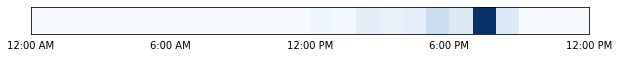

In [10]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 0.5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

# Creating plot
plt.hist2d(
    df["hour_of_day"],
    df["empty"],
    cmap=plt.get_cmap("Blues"),
    range=[[0, 24], [0, 1]],
    bins=[24, 1],
)

# Ticks
ax.tick_params(bottom=False, left=False)
ax.set_yticks([])
hours = ["12:00 AM", "6:00 AM", "12:00 PM", "6:00 PM", "12:00 PM"]
ax.xaxis.set_major_formatter(FuncFormatter(lambda self, i: hours[i]))
ax.set_xticks([0, 6, 12, 18, 24])

# Show plot
plt.show()

# Day of week

<Figure size 576x360 with 0 Axes>

<Figure size 9600x6000 with 0 Axes>

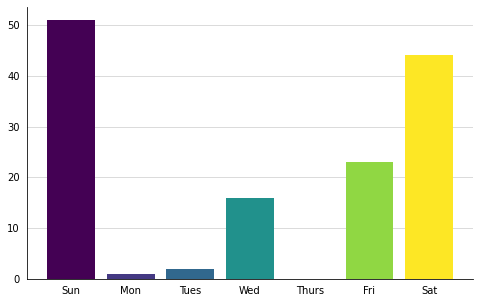

In [24]:
df_date = df.groupby("day_of_week").agg(count=("empty", "count")).reset_index()

plt.clf()
plt.rcParams["figure.figsize"] = (8, 5)
plt.figure(dpi=1200)
fig, ax = plt.subplots()

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: y/6

# Plot data
plt.bar(df_date["day_of_week"], df_date["count"], color=my_cmap(rescale(df_date["day_of_week"])))

# Axes and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color="lightgray")

# X tick labels
days = ["", "Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"]
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda self, i: days[i] if i >= 0 and i < len(days) else "")
)

# Heatmap

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


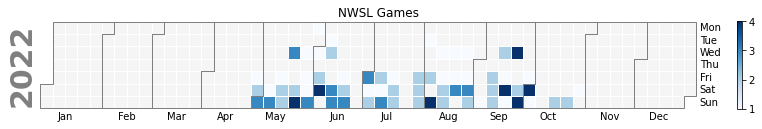

In [27]:
df.set_index("date", inplace=True)
pl1 = calplot.calplot(
    data=df["home"],
    how="count",
    cmap="Blues",
    suptitle="NWSL Games",
    colorbar=True
)